# Análise Estatística de Dados Telefônicos

Segue aqui um projeto de DEA, (dea data envelopment analysis), de bancos de dados de uma empresa fictícia chamada Megaline.

## Iniciação

- Carregando pandas para o manejo do banco de dados
- Matplotlib para desfrutar da vizualização gráfica dos dados
- Statistics para cálculos de estatística
- Datetime para formatação das datas na coluna referente ao dia no calendário
- Seaborn como complemento ao matplotlib
- Alpha como nível crítico de significância estatística

In [1]:
import pandas as pd
import matplotlib as plot
import statistics
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from functools import reduce
from scipy import stats as st
alpha=0.05

Ignorando avisos do python.

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [3]:
#Carregando os dataframes.
df_call=pd.read_csv('/datasets/megaline_calls.csv')
df_net=pd.read_csv('/datasets/megaline_internet.csv')
df_msg=pd.read_csv('/datasets/megaline_messages.csv')
df_plans=pd.read_csv('/datasets/megaline_plans.csv')
df_user=pd.read_csv('/datasets/megaline_users.csv')

## Observando dados gerais de todos os dataframes disponibilizados.

In [4]:
# Imprimindo  as informações gerais/resumidas sobre os DataFrames
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
df_call.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [6]:
df_call.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [7]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [8]:
df_net.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [9]:
df_net.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [10]:
df_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
df_msg.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [12]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [13]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [14]:
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [15]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
df_user.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [17]:
df_user.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


# Explorando os dados iniciais

    Conforme analisado as informações das tabelas, pode-se concluir que é necessário:
- Apagar os dados refentes as linhas canceladas, pois vão se distanciar da tabela.
- Definir como tipo 'datetime' as colunas referente a data da ligação, sessão de internet e mensagem.

In [18]:
df_user=df_user.drop(df_user[df_user['churn_date'].isna()==False].index)

In [19]:
df_user=df_user.drop(columns='churn_date')

In [20]:
df_call['call_date']

0         2018-12-27
1         2018-12-27
2         2018-12-27
3         2018-12-28
4         2018-12-30
             ...    
137730    2018-11-21
137731    2018-10-20
137732    2018-09-21
137733    2018-10-10
137734    2018-12-29
Name: call_date, Length: 137735, dtype: object

In [21]:
df_call['call_date'] = pd.to_datetime(df_call['call_date'], format='%Y-%m-%d')

In [22]:
df_msg['message_date']= pd.to_datetime(df_msg['message_date'], format='%Y-%m-%d')

In [23]:
df_net['session_date'] = pd.to_datetime(df_net['session_date'], format='%Y-%m-%d')

In [24]:
df_call['call_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 137735 entries, 0 to 137734
Series name: call_date
Non-Null Count   Dtype         
--------------   -----         
137735 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB


In [25]:
df_net['session_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 104825 entries, 0 to 104824
Series name: session_date
Non-Null Count   Dtype         
--------------   -----         
104825 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 819.1 KB


In [26]:
df_call['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [27]:
df_call['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

Dados corrigidos!

## Enriquecendo dados
- Renomeando as colunas para fundir os dataframes.
- Criando tabela dinâmica baseada no número de ligações, duração, número de mensagens e uso de internet
- Fundindo todas as tabelas, e adicionando na dinâmica a idade, local e plano de cada usuário.
- Aplicando função para calcular preço para cada usuário, partindo de cada plano.

In [28]:
df_call=df_call.rename(columns={'call_date':'date'})

In [29]:
df_call=df_call.rename(columns={'id':'num_calls'})

In [30]:
df_msg=df_msg.rename(columns={'message_date':'date'})

In [31]:
df_msg=df_msg.rename(columns={'id':'num_msgs'})

In [32]:
df_net=df_net.rename(columns={'session_date':'date'})

- Criando tabela dinâmica baseada no número de ligações, duração, número de mensagens e uso de internet.

In [33]:
pivot_calls=df_call.pivot_table(index=['user_id', df_call['date'].dt.month], values='num_calls', aggfunc='count')

In [34]:
pivot_calls

num_calls
user_id date           
1000    12           16
1001    8            27
        9            49
        10           65
        11           64
...                 ...
1498    12           39
1499    9            41
        10           53
        11           45
        12           65

[2258 rows x 1 columns]

In [35]:
pivot_duration=df_call.pivot_table(index=['user_id', df_call['date'].dt.month], values='duration', aggfunc='sum')

In [36]:
pivot_duration

duration
user_id date          
1000    12      116.83
1001    8       171.14
        9       297.69
        10      374.11
        11      404.59
...                ...
1498    12      324.77
1499    9       330.37
        10      363.28
        11      288.56
        12      468.10

[2258 rows x 1 columns]

In [37]:
pivot_msg=df_msg.pivot_table(index=['user_id', df_msg['date'].dt.month], values='num_msgs', aggfunc='count')

pivot_msg.index(index={'message_date': 'Date'})

In [38]:
pivot_msg

num_msgs
user_id date          
1000    12          11
1001    8           30
        9           44
        10          53
        11          36
...                ...
1496    9           21
        10          18
        11          13
        12          11
1497    12          50

[1806 rows x 1 columns]

In [39]:
pivot_net=df_net.pivot_table(index=['user_id', df_net['date'].dt.month], values='mb_used', aggfunc='sum')

In [40]:
pivot_net

mb_used
user_id date          
1000    12     1901.47
1001    8      6919.15
        9     13314.82
        10    22330.49
        11    18504.30
...                ...
1498    12    23137.69
1499    9     12984.76
        10    19492.43
        11    16813.83
        12    22059.21

[2277 rows x 1 columns]

- Fundindo todas as tabelas, e adicionando na dinâmica a idade, local e plano de cada usuário.

Aplicando reduce, função a qual possibilita adicionar uma lista de dataframes a um merge único.
Perceba que aqui nos estamos passando uma lista que tem os dataframes que seram aplicados o merge [pivot_calls, pivot_duration, pivot_msg, pivot_net], usando o reduce e o lambda ele vai fazer com que inicialmente l receba pivot_calls e r será o dataframe pivot_net, e depois l vai ser a junção desses dois dataframes.

In [41]:
all_df = reduce(lambda l, r: pd.merge(l, r, on=['user_id', 'date'], how='outer'), [pivot_calls, pivot_duration, pivot_msg, pivot_net])

- Fundindo as tabelas adicionais com merge.

In [42]:
all_df = pd.merge(left = all_df.reset_index(), right = df_user[['user_id', 'plan']], how = 'left', on = 'user_id')

In [43]:
all_df = pd.merge(left = all_df.reset_index(), right = df_user[['user_id', 'age']], how = 'left', on = 'user_id')

In [44]:
all_df = pd.merge(left = all_df.reset_index(), right = df_user[['user_id', 'city']], how = 'left', on = 'user_id')

- Verificando all_df

In [45]:
all_df

,level_0,index,user_id,date,num_calls,duration,num_msgs,mb_used,plan,age,city
0,0,0,1000,12,16.0,116.83,11.0,1901.47,ultimate,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1,1,1001,8,27.0,171.14,30.0,6919.15,surf,28.0,"Seattle-Tacoma-Bellevue, WA MSA"
2,2,2,1001,9,49.0,297.69,44.0,13314.82,surf,28.0,"Seattle-Tacoma-Bellevue, WA MSA"
3,3,3,1001,10,65.0,374.11,53.0,22330.49,surf,28.0,"Seattle-Tacoma-Bellevue, WA MSA"
4,4,4,1001,11,64.0,404.59,36.0,18504.30,surf,28.0,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...,...,...
2288,2288,2288,1349,12,NaN,NaN,61.0,13039.91,surf,69.0,"Boston-Cambridge-Newton, MA-NH MSA"
2289,2289,2289,1361,5,NaN,NaN,2.0,1519.69,surf,45.0,"Birmingham-Hoover, AL MSA"
2290,2290,2290,1482,10,NaN,NaN,2.0,NaN,ultimate,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2291,2291,2291,1108,12,NaN,NaN,NaN,233.17,ultimate,45.0,"Salt Lake City, UT MSA"


- Aplicando função para calcular preço para cada usuário, partindo de cada plano.

In [46]:
def price_surf(row):
    global all_df
    all_surf=all_df.drop(all_df[all_df['plan']=='ultimate'].index)
    if (row['user_id'] in (all_surf['user_id'].unique()))==True:
        price=0
        try:
            if math.ceil(row['duration'])>500:
                price+=(math.ceil(row['duration'])-500)*0.03
        except:
            price=0
        if row['num_msgs']>50:
            price+=(row['num_msgs']-50)*0.03
        if row['mb_used']>15360:
            price+=((math.ceil(row['mb_used']/1024))-15)*10
        return price+20
    return None

In [47]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   level_0    2293 non-null   int64  
 1   index      2293 non-null   int64  
 2   user_id    2293 non-null   int64  
 3   date       2293 non-null   int64  
 4   num_calls  2258 non-null   float64
 5   duration   2258 non-null   float64
 6   num_msgs   1806 non-null   float64
 7   mb_used    2277 non-null   float64
 8   plan       2135 non-null   object 
 9   age        2135 non-null   float64
 10  city       2135 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 215.0+ KB


In [48]:
all_df['price']=all_df.apply(price_surf, axis=1)

In [49]:
def price_ultimate(row):
    global all_df
    all_ultimate=all_df.drop(all_df[all_df['plan']=='surf'].index)
    if (row['user_id'] in (all_ultimate['user_id'].unique()))==True:
        price=0
        try:
            if math.ceil(row['duration'])>3000 :
                price+=(math.ceil(row['duration'])-3000 )*0.01
        except:
            price=0
        if row['num_msgs']>1000 :
            price+=(row['num_msgs']-1000 )*0.01
        if row['mb_used']>30720:
            price+=((math.ceil(row['mb_used']/1024))-30)*10
        return price+70
    return row['price']

In [50]:
all_df['price']=all_df.apply(price_ultimate, axis=1)

In [51]:
all_df

,level_0,index,user_id,date,num_calls,duration,num_msgs,mb_used,plan,age,city,price
0,0,0,1000,12,16.0,116.83,11.0,1901.47,ultimate,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1,1,1001,8,27.0,171.14,30.0,6919.15,surf,28.0,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,2,2,1001,9,49.0,297.69,44.0,13314.82,surf,28.0,"Seattle-Tacoma-Bellevue, WA MSA",20.00
3,3,3,1001,10,65.0,374.11,53.0,22330.49,surf,28.0,"Seattle-Tacoma-Bellevue, WA MSA",90.09
4,4,4,1001,11,64.0,404.59,36.0,18504.30,surf,28.0,"Seattle-Tacoma-Bellevue, WA MSA",60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2288,2288,2288,1349,12,NaN,NaN,61.0,13039.91,surf,69.0,"Boston-Cambridge-Newton, MA-NH MSA",20.33
2289,2289,2289,1361,5,NaN,NaN,2.0,1519.69,surf,45.0,"Birmingham-Hoover, AL MSA",20.00
2290,2290,2290,1482,10,NaN,NaN,2.0,NaN,ultimate,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",70.00
2291,2291,2291,1108,12,NaN,NaN,NaN,233.17,ultimate,45.0,"Salt Lake City, UT MSA",70.00


### Criando função para calcular principais fatores estatísticos.

In [52]:
def statistic_data(column):
    print('Analisando: ', column)
    print('A média do plano Surf é:', all_df[column][all_df['plan']=='surf'].mean())
    print('O desvio padrão do plano Surf é:', np.std(all_df[column][all_df['plan']=='surf']))
    print('A variância do plano Surf é:', np.var(all_df[column][all_df['plan']=='surf']))
    print('A média do plano Ultimate é:', all_df[column][all_df['plan']=='ultimate'].mean())
    print('O desvio padrão do plano Ultimate é:', np.std(all_df[column][all_df['plan']=='ultimate']))
    print('A variância do plano Ultimate é:', np.var(all_df[column][all_df['plan']=='ultimate']))
    return None

# Análise Exploratória de Dados
Será descrito o comportamento dos clientes. Encontrando os minutos, mensagens de texto e volume de dados que usuários de cada plano necessitam por mês. Calculando a média, variância e o desvio padrão serão construídos histogramas.

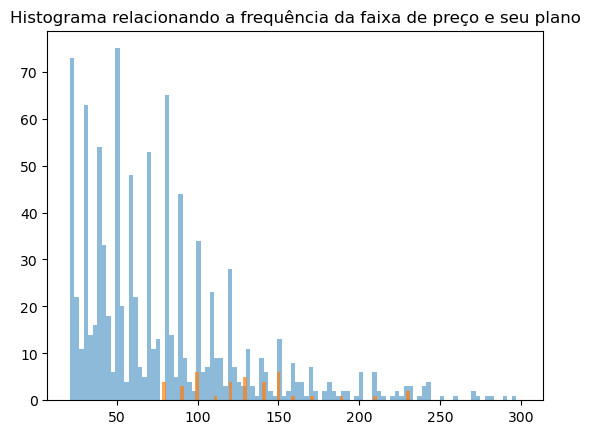

In [53]:
plt.hist(all_df[all_df['plan']=='surf']['price'], alpha=0.5, bins=100, range=(21,300));
plt.hist(all_df[all_df['plan']=='ultimate']['price'], alpha=0.7, bins=100, range=(71,300));
plt.title('Histograma relacionando a frequência da faixa de preço e seu plano');

In [54]:
statistic_data('price')

Analisando:  price
A média do plano Surf é: 60.53547375596449
O desvio padrão do plano Surf é: 55.777637976691636
A variância do plano Surf é: 3111.1448982588727
A média do plano Ultimate é: 73.51796407185628
O desvio padrão do plano Ultimate é: 16.848780781382008
A variância do plano Ultimate é: 283.88141381906775


É notável que os preços do plano ultimate além de possuírem uma média maior, variam menos em comparação aos preços de surf.

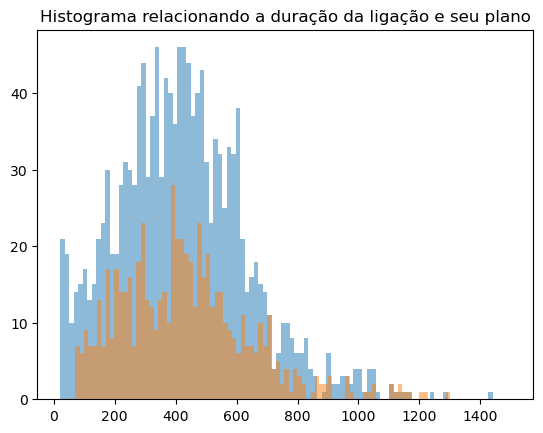

In [55]:
plt.hist(all_df[all_df['plan']=='surf']['duration'], alpha=0.5, bins=100, range=(21,1500))
plt.hist(all_df[all_df['plan']=='ultimate']['duration'], alpha=0.5, bins=100, range=(71,1500))
plt.title('Histograma relacionando a duração da ligação e seu plano');

In [56]:
statistic_data('duration')

Analisando:  duration
A média do plano Surf é: 414.7205976372484
O desvio padrão do plano Surf é: 217.9738983415794
A variância do plano Surf é: 47512.62035822519
A média do plano Ultimate é: 411.34490166414486
O desvio padrão do plano Ultimate é: 228.130322587089
A variância do plano Ultimate é: 52043.44408368929


Pode-se concluir que as ligações dos planos possuem médias e variações praticamente iguais analisando os dados.

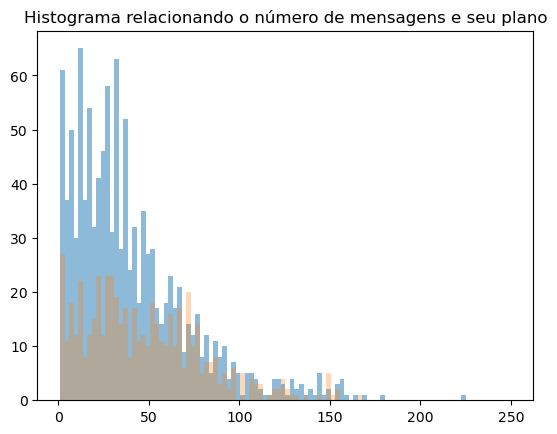

In [57]:
plt.hist(all_df[all_df['plan']=='surf']['num_msgs'], alpha=0.5, bins=100, range=(1,250))
plt.hist(all_df[all_df['plan']=='ultimate']['num_msgs'], alpha=0.3, bins=100, range=(1,250))
plt.title('Histograma relacionando o número de mensagens e seu plano');

In [58]:
statistic_data('num_msgs')

Analisando:  num_msgs
A média do plano Surf é: 40.18777292576419
O desvio padrão do plano Surf é: 33.40460743815006
A variância do plano Surf é: 1115.86779809691
A média do plano Ultimate é: 47.30442804428044
O desvio padrão do plano Ultimate é: 33.15681096296432
A variância do plano Ultimate é: 1099.3741132337511


Por conseguinte, mediante os dados acima, é concluível que o número de mensagens varia semelhantemente nos dois planos

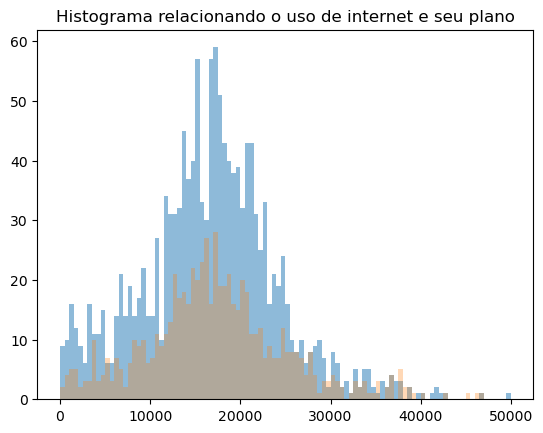

In [59]:
plt.hist(all_df[all_df['plan']=='surf']['mb_used'], alpha=0.5, bins=100, range=(1,50000))
plt.hist(all_df[all_df['plan']=='ultimate']['mb_used'], alpha=0.3, bins=100, range=(1,50000))
plt.title('Histograma relacionando o uso de internet e seu plano');

In [60]:
statistic_data('mb_used')

Analisando:  mb_used
A média do plano Surf é: 16768.5747006194
O desvio padrão do plano Surf é: 7900.757940365723
A variância do plano Surf é: 62421976.03225202
A média do plano Ultimate é: 17346.107901049483
O desvio padrão do plano Ultimate é: 7928.80612712298
A variância do plano Ultimate é: 62865966.6015029


Os usuários dos dois planos utilizam a internet similarmente.

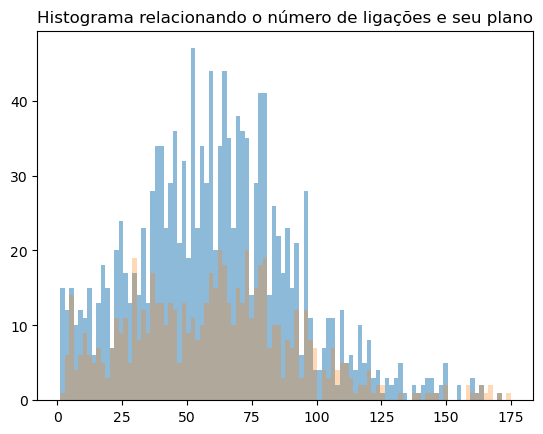

In [61]:
plt.hist(all_df[all_df['plan']=='surf']['num_calls'], alpha=0.5, bins=100, range=(1,175))
plt.hist(all_df[all_df['plan']=='ultimate']['num_calls'], alpha=0.3, bins=100, range=(1,175))
plt.title('Histograma relacionando o número de ligações e seu plano');

In [62]:
statistic_data('num_calls')

Analisando:  num_calls
A média do plano Surf é: 61.286309937456565
O desvio padrão do plano Surf é: 31.447674756752843
A variância do plano Surf é: 988.95624760651
A média do plano Ultimate é: 61.33888048411498
O desvio padrão do plano Ultimate é: 33.37582469976809
A variância do plano Ultimate é: 1113.9456743896496


O número de ligações em média, é ligeiramente maior no plano ultimate, assim como a variação.

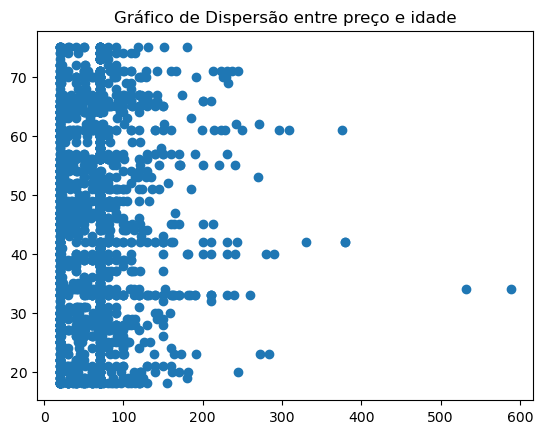

In [63]:
plt.scatter(all_df['price'], all_df['age'])
plt.title('Gráfico de Dispersão entre preço e idade')
plt.show();

In [64]:
statistic_data('age')

Analisando:  age
A média do plano Surf é: 44.59850034083163
O desvio padrão do plano Surf é: 16.5241043222992
A variância do plano Surf é: 273.04602365422704
A média do plano Ultimate é: 47.377245508982035
O desvio padrão do plano Ultimate é: 16.456572051015517
A variância do plano Ultimate é: 270.818763670265


As idades são semelhantes para ambos os planos.

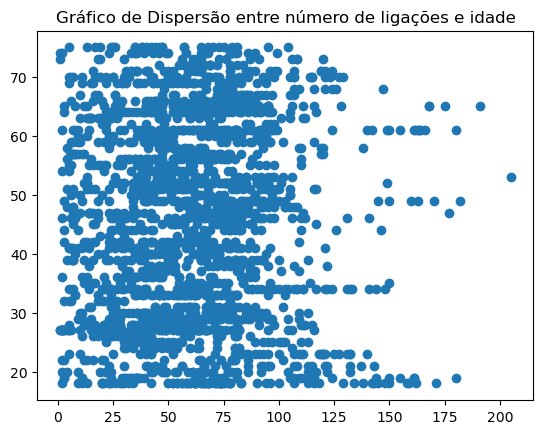

In [65]:
plt.scatter(all_df['num_calls'], all_df['age'])
plt.title('Gráfico de Dispersão entre número de ligações e idade')
plt.show();

Usuários na faixa de 70 e 30 anos tem o número de ligações ligeiramente maior.

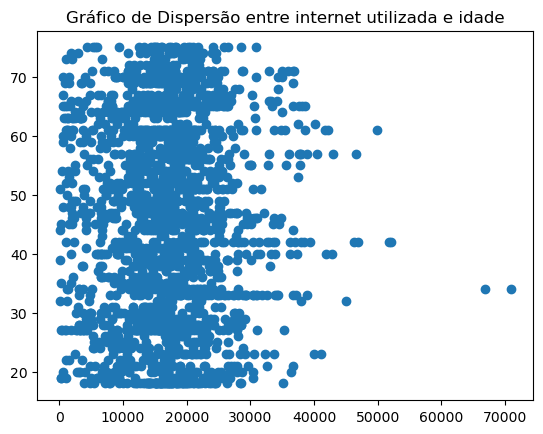

In [66]:
plt.scatter(all_df['mb_used'], all_df['age'])
plt.title('Gráfico de Dispersão entre internet utilizada e idade')
plt.show();

Dados normais, com um ligeiro aumento de internet utilizada na faixa de 30 a 40 anos.

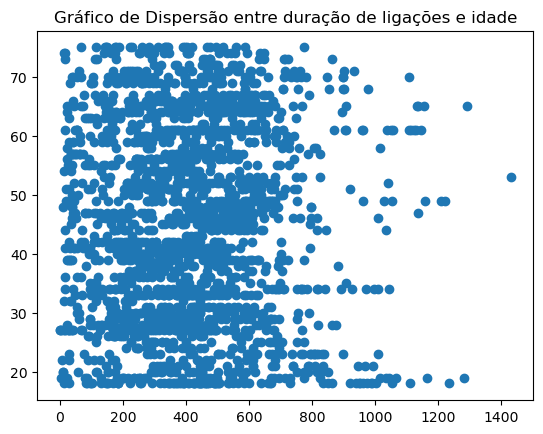

In [67]:
plt.scatter(all_df['duration'], all_df['age'])
plt.title('Gráfico de Dispersão entre duração de ligações e idade')
plt.show();

Distribuição normal.

In [68]:
pivot_plan=all_df.pivot_table(index=['plan'], values='price', aggfunc='median')

Text(0.5, 1.0, 'Preço médio pago em mês por cada plano')

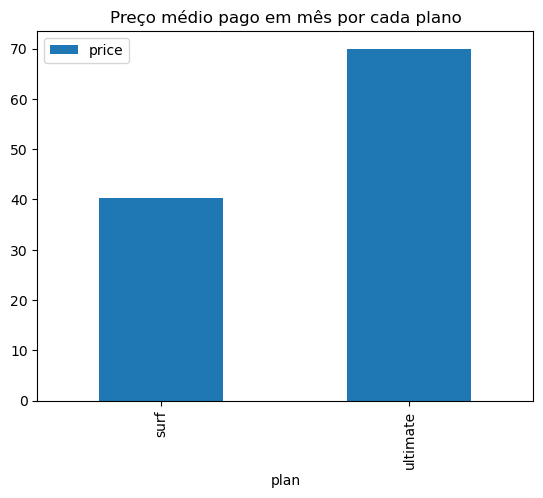

In [69]:
pivot_plan.plot(kind='bar')
plt.title('Preço médio pago em mês por cada plano')

# Análise Estatística de Dados

- Salvando a lista dos valores de cada mês em duas variáveis.

In [70]:
surf=all_df['price'][all_df['plan']=='surf']
ultimate=all_df['price'][all_df['plan']=='ultimate']

## Utilizando Hipótese sobre a Igualdade das Médias de Duas Populações
Comparando médias do preço entre os dois planos, e concluíndo se a hipótese do plano Ultimate, produzir mais renda para a companhia é verdadeira.

In [71]:
significancia_plano=st.ttest_ind(surf, ultimate)

Utilizando valor alpha definido junto com as bibliotecas para definir uma porcentagem de aceitação estatística, nesse caso, 5%.
Logo o teste vai calcular se a probabilidade de obter aleatoriamente uma diferença da aceitação, ou maior é encontrada nas amostras.
Hipotese Nula = As médias dos planos surf e ultimate são iguais
Hipotese Alternativa= As médias dos planos surf e ultimate são diferentes.

In [72]:
if significancia_plano.pvalue < alpha:
    print("Rejeitamos a hipótese nula, logo as populações possuem médias de preço significativamente diferentes.")
else:
    print("Nós não podemos rejeitar a hipótese nula") 

Rejeitamos a hipótese nula, logo as populações possuem médias de preço significativamente diferentes.


Temos evidências para rejeitar a hipótese nula, indicando que as médias não são iguais para os dois planos.

In [73]:
#Utilizando query para procurar no dataframe onde a cidade Nova York é encontrada para comparar com todas as outras do dataframe.
NY_NJ = all_df[all_df['city'].str.contains('NY-NJ', na=False)]
Not_NY_NJ = all_df.query('city not in @NY_NJ.city')

Calculando a significância comparando os dados de Nova York e do resto do df.

In [74]:
significancia_local=st.ttest_ind(NY_NJ['price'], Not_NY_NJ['price'])

In [75]:
if significancia_local.pvalue < alpha:
    print("Rejeitamos a hipótese nula, logo as populações possuem médias de preço significativamente diferentes.")
else:
    print("Nós não podemos rejeitar a hipótese nula, então as populações não possuem médias de preços significativamente diferentes.") 

Nós não podemos rejeitar a hipótese nula, então as populações não possuem médias de preços significativamente diferentes.


Temos evidências para aceitar a hipótese nula, indicando que as médias são iguais para as áreas calculadas.

# Conclusão
## Inicialização dos dados

Para tratá-los, foi criada uma tabela geral com todos os tipos de informações divididas por mês, para facilitar na exploração e vizualização dos dados.

## Tratamento dos dados

Foram transformados em datetime as colunas necessárias.

## Enriquecimento dos dados

Foram utilizadas funções merge para fundir os dataframes e facilitar o uso dos dados.

## Análise exploratória de dados

### A partir da vizualização por gráficos, é possível concluir que:

- É notável que os preços do plano ultimate além de possuírem uma média maior, variam menos em comparação aos preços de surf.
- Pode-se concluir que as ligações dos planos possuem médias e variações praticamente iguais analisando os dados.
- Por conseguinte, mediante os dados acima, é concluível que o número de mensagens varia semelhantemente nos dois planos
- Os usuários dos dois planos utilizam a internet similarmente.
- O número de ligações em média, é ligeiramente maior no plano ultimate, assim como a variação.
- As idades são semelhantes para ambos os planos.
- Ligeiro aumento de internet utilizada na faixa de 30 a 40 anos.

## Análise estatística de dados

### Diferença da média do preço de acordo com os planos

- Rejeição da hipótese nula, logo as populações possuem médias de preço significativamente diferentes.

### Diferença da média do preço de acordo com a área (em Nova York, ou fora)

- Hipótese nula aceita, as médias das populações não contêm diferenças significativas para a hipóteses de haver uma diferença de preço pago pela área onde o usuário vive.

## Plano com mais receita

### Ultimate Plan deve receber mais foco orçamentário.

Por conseguinte, mediante os dados analisados, é deduzido que o usuário do Ultimate Plan gera mais receita para a operadora em comparação ao usuário do surf. A partir dos gráficos e teste de hipótese temos uma média maior de valor gasto para o usuário do ultimate plan, portanto, gera mais lucro a companhia.